# Author

Daniel Soto


# Introduction

This notebook uses toy data to illustrate regression in statsmodels.

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import WP19_analysis as wpa
import statsmodels.api as sm

/Users/dsoto/anaconda/envs/wp19/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


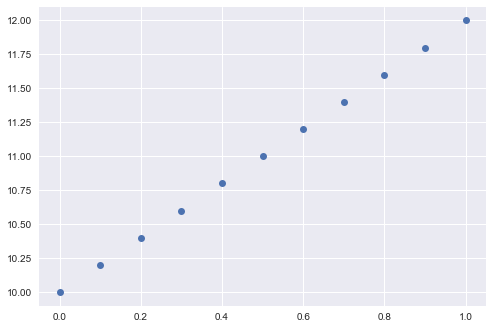

In [3]:
# generate simple linear data

independent_variable = np.linspace(0,1,11)
polynomial = [2,10] # polyval orders high degree to low degree
dependent_variable = np.polyval(polynomial, independent_variable)
plt.plot(independent_variable, dependent_variable, marker='o', linestyle='')

In [4]:
# set up arrays for the variables and fit model
y = dependent_variable
X = independent_variable
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

/Users/dsoto/anaconda/envs/wp19/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.691e+29
Date:                Mon, 20 Nov 2017   Prob (F-statistic):          4.52e-130
Time:                        07:43:26   Log-Likelihood:                 351.79
No. Observations:                  11   AIC:                            -699.6
Df Residuals:                       9   BIC:                            -698.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0000   1.95e-15   5.13e+15      0.000      10.000      10.000
x1             2.0000   3.29e-15   6.08e+14      0.000       2.000       2.000
==============================================================================
Omnibus:                        0.860   Durbin-Watson:                   0.147
Prob(Omnibus):                  0.651   Jarque-Bera (JB):                0.685
Skew:                           0.509   Prob(JB):                        0.710
Kurtosis:                       2.324   Cond. No.                         4.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
# the variables are in the order shown in the summary
model.predict([1,0.5])

array([ 11.])

In [6]:
# if you use a dataframe, you get data labels in the model ('ind')

data = pd.DataFrame({'dep':dependent_variable, 'ind':independent_variable})
y = data['dep']
X = data['ind']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
model.summary()

/Users/dsoto/anaconda/envs/wp19/lib/python3.6/site-packages/scipy/stats/stats.py:1334: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    dep   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.691e+29
Date:                Mon, 20 Nov 2017   Prob (F-statistic):          4.52e-130
Time:                        07:43:26   Log-Likelihood:                 351.79
No. Observations:                  11   AIC:                            -699.6
Df Residuals:                       9   BIC:                            -698.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0000   1.95e-15   5.13e+15      0.000      10.000      10.000
ind            2.0000   3.29e-15   6.08e+14      0.000       2.000       2.000
==============================================================================
Omnibus:                        0.860   Durbin-Watson:                   0.147
Prob(Omnibus):                  0.651   Jarque-Bera (JB):                0.685
Skew:                           0.509   Prob(JB):                        0.710
Kurtosis:                       2.324   Cond. No.                         4.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""